In [2]:
import tensorflow as tf

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [6]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

In [7]:
x_train = mnist_train.iloc[:,1:].values
y_train = mnist_train.iloc[:,0].values
x_test = mnist_test.iloc[:, 1:].values
y_test = mnist_test.iloc[:, 0].values

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [18]:
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

In [19]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7308 - loss: 1.0274 - val_accuracy: 0.9072 - val_loss: 0.3522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9029 - loss: 0.3505 - val_accuracy: 0.9191 - val_loss: 0.2918
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9187 - loss: 0.2945 - val_accuracy: 0.9285 - val_loss: 0.2577
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2617 - val_accuracy: 0.9329 - val_loss: 0.2364
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9334 - loss: 0.2430 - val_accuracy: 0.9392 - val_loss: 0.2173
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9397 - loss: 0.2155 - val_accuracy: 0.9430 - val_loss: 0.2030
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9442 - loss: 0.1977 - val_accuracy: 0.9450 - val_loss: 0.1910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9468 - loss: 0.1923 - 

In [21]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9440 - loss: 0.1913
loss=0.165
Accuracy=0.952


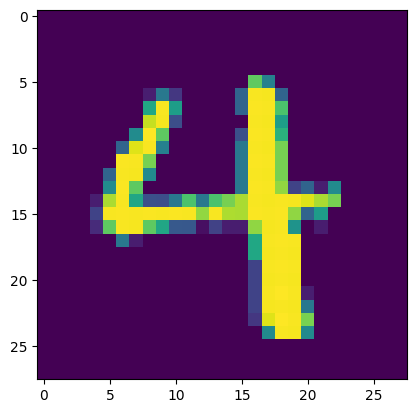

In [22]:
n = random.randint(0,9999)
plt.imshow(x_test[n])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


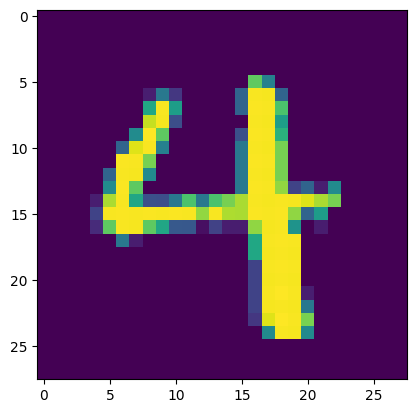

In [23]:
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [24]:
print('Predicted value:',predicted_value[n])

Predicted value: [1.3480318e-05 1.2516498e-06 5.2076015e-05 6.8255054e-04 9.3244499e-01
 1.3075487e-04 1.3638445e-04 2.1812366e-03 7.8529702e-05 6.4278774e-02]


In [25]:
predicted_number = np.argmax(predicted_value[n])

print('Predicted vlaue:', predicted_number)

Predicted vlaue: 4


In [26]:
history.history??

Type:        dict
String form: {'accuracy': [0.8384666442871094, 0.9067666530609131, 0.9200666546821594, 0.9282666444778442, 0.9348000288009644, 0.9405666589736938, 0.9445000290870667, 0.948033332824707, 0.9512500166893005, 0.9540333151817322], 'loss': [0.6410834789276123, 0.3350994288921356, 0.28613048791885376, 0.25540468096733093, 0.2322622537612915, 0.21388694643974304, 0.19846975803375244, 0.18520012497901917, 0.17385122179985046, 0.16375717520713806], 'val_accuracy': [0.9071999788284302, 0.9190999865531921, 0.9284999966621399, 0.9329000115394592, 0.9391999840736389, 0.9430000185966492, 0.9449999928474426, 0.948199987411499, 0.9527000188827515, 0.9524000287055969], 'val_loss': [0.3521604537963867, 0.291830837726593, 0.25769850611686707, 0.23643095791339874, 0.2173370122909546, 0.20300336182117462, 0.19095756113529205, 0.18182021379470825, 0.17003020644187927, 0.1647070348262787]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

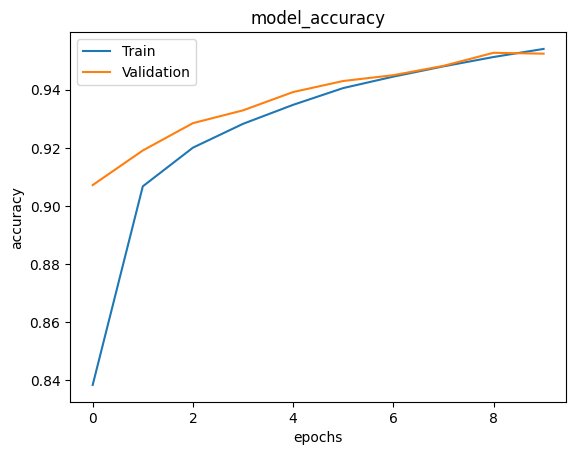

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model_accuracy')
plt.legend(['Train','Validation'])
plt.show()

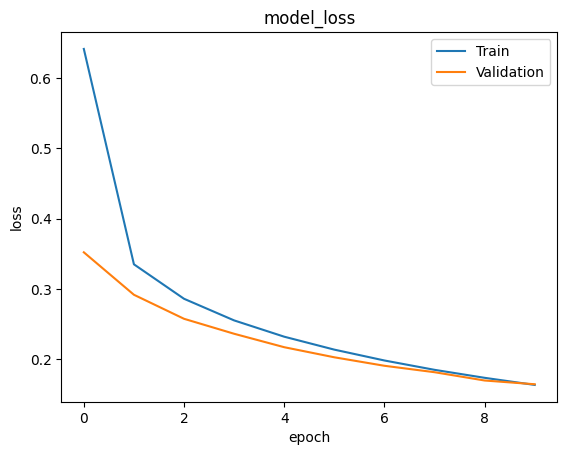

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

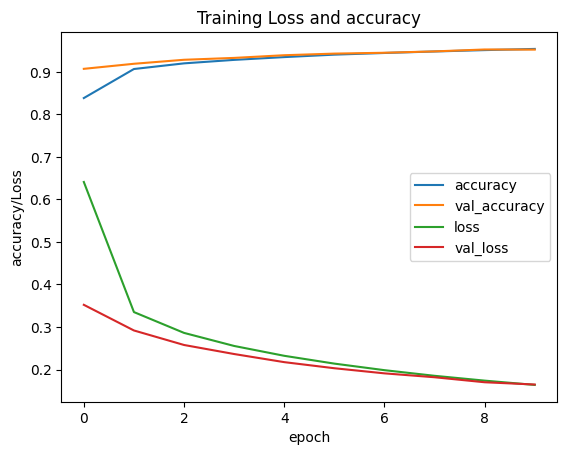

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])      
plt.show()